# ToDo

1-hyperparameter tuninning for each model to adjust f1-score for low class

2-search for better balancing way to balance data

3-try to make feature engineering to build new relevant features(unsuppervised like clustering)

4-try to handle outliers(logtransfom,powertransform,clipping outliers at IQR or robust scaling)

5-search for more effective feature

6-is there more better way than PCA? [take most important features and drop the rest]

7-try lightboost and softVoting between best models used

In [1]:
#!pip install scikit-plot
#!pip install imblearn
#!pip install xgboost

# make imports

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import KNNImputer

In [3]:
data=pd.read_excel("Dry_Bean_Dataset.xlsx")

In [4]:
data.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

# Check for missing values

In [6]:
data.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [7]:
data.describe().T

count          mean           std           min  \
Area             13611.0  53048.284549  29324.095717  20420.000000   
Perimeter        13611.0    855.283459    214.289696    524.736000   
MajorAxisLength  13611.0    320.141867     85.694186    183.601165   
MinorAxisLength  13611.0    202.270714     44.970091    122.512653   
AspectRation     13611.0      1.583242      0.246678      1.024868   
Eccentricity     13611.0      0.750895      0.092002      0.218951   
ConvexArea       13611.0  53768.200206  29774.915817  20684.000000   
EquivDiameter    13611.0    253.064220     59.177120    161.243764   
Extent           13611.0      0.749733      0.049086      0.555315   
Solidity         13611.0      0.987143      0.004660      0.919246   
roundness        13611.0      0.873282      0.059520      0.489618   
Compactness      13611.0      0.799864      0.061713      0.640577   
ShapeFactor1     13611.0      0.006564      0.001128      0.002778   
ShapeFactor2     13611.0      0.001716      0.000596      0.000564   
ShapeFactor3     13611.0      0.643590      0.098996      0.410339   
ShapeFactor4     13611.0      0.995063      0.004366      0.947687   

                          25%           50%           75%            max  
Area             36328.000000  44652.000000  61332.000000  254616.000000  
Perimeter          703.523500    794.941000    977.213000    1985.370000  
MajorAxisLength    253.303633    296.883367    376.495012     738.860153  
MinorAxisLength    175.848170    192.431733    217.031741     460.198497  
AspectRation         1.432307      1.551124      1.707109       2.430306  
Eccentricity         0.715928      0.764441      0.810466       0.911423  
ConvexArea       36714.500000  45178.000000  62294.000000  263261.000000  
EquivDiameter      215.068003    238.438026    279.446467     569.374358  
Extent               0.718634      0.759859      0.786851       0.866195  
Solidity             0.985670      0.988283      0.990013       0.994677  
roundness            0.832096      0.883157      0.916869       0.990685  
Compactness          0.762469      0.801277      0.834270       0.987303  
ShapeFactor1         0.005900      0.006645      0.007271       0.010451  
ShapeFactor2         0.001154      0.001694      0.002170       0.003665  
ShapeFactor3         0.581359      0.642044      0.696006       0.974767  
ShapeFactor4         0.993703      0.996386      0.997883       0.999733

In [8]:
data['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [9]:
data['Class'].replace({'DERMASON':0,'SIRA':1,'SEKER':2,'HOROZ':3,'CALI':4,'BARBUNYA':5,'BOMBAY':6},inplace=True)

In [10]:
data.sample(1)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
1514  42651    755.515       270.997528       200.552465      1.351255   

      Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
1514      0.672549       43001     233.034203  0.784256  0.991861   0.938973   

      Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
1514     0.859913      0.006354      0.002143       0.73945      0.999185   

      Class  
1514      2

# Explore classes imbalance

<AxesSubplot:>

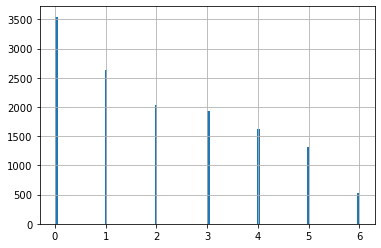

In [11]:
data['Class'].hist(bins=int(np.sqrt(data['Class'].shape[0])))

In [12]:
y=data['Class']
X=data.drop(columns='Class')

# split data with ratio between classes is fixed in train/test/div sets

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=data['Class'])

In [14]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=42,stratify=y_train)

In [15]:
y_train.value_counts()/len(y_train)

0    0.260505
1    0.193685
2    0.148909
3    0.141676
4    0.119747
5    0.097130
6    0.038347
Name: Class, dtype: float64

In [16]:
y_val.value_counts()/len(y_val)

0    0.260790
1    0.193756
2    0.148760
3    0.141414
4    0.119835
5    0.096878
6    0.038567
Name: Class, dtype: float64

# Fit base model to see the effect of imbalance on classifier performance

In [17]:
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)



DecisionTreeClassifier()

# Important features to consider

[Feature importance Explaination](https://www.youtube.com/watch?v=cw4qG9ePZ9Y&ab_channel=CompStatMunich)

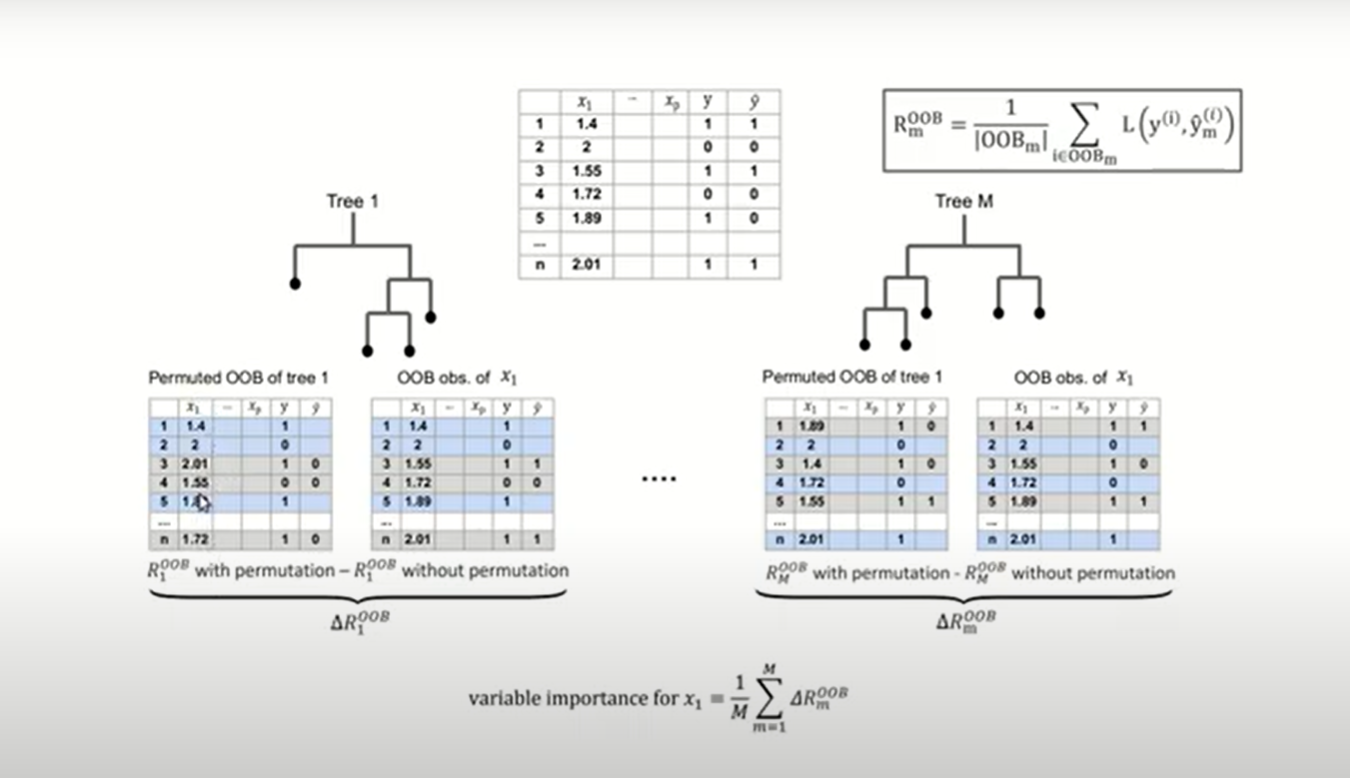



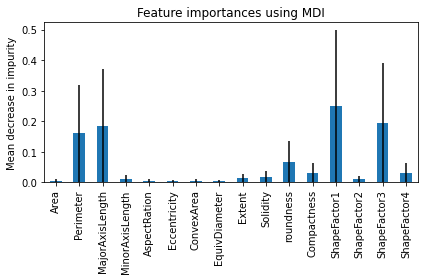

In [18]:
importances=clf.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=forest_importances, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [19]:
y_pred=clf.predict(X_val)
y_pred_prob=clf.predict_proba(X_val)

In [20]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

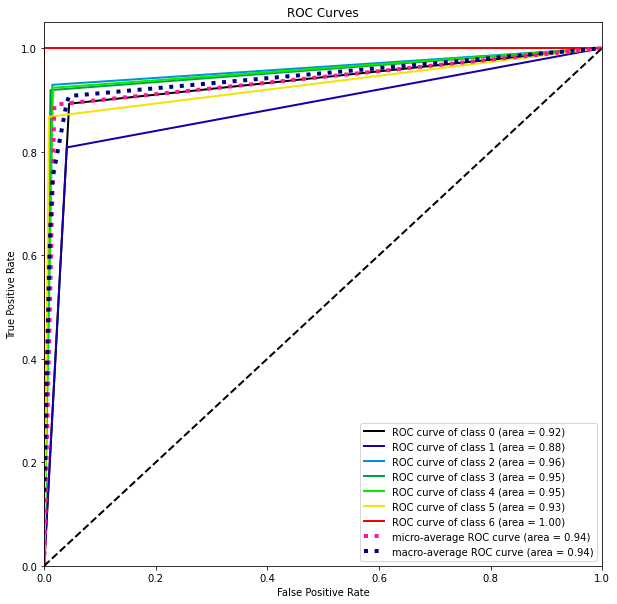

In [89]:
plot_roc(y_val, y_pred_prob,figsize=(10, 10));
#plt.figure(figsize=(20, 20))

model can differenatiate between different classes well so untill now we don't need to make down or oversampling or handeling

imbalance yet

# Preprocessing on train data

In [22]:
X_train_copy=X_train.copy()
y_train_copy=y_train.copy()
df_copy=pd.concat([X_train,y_train],axis=1)

# Give trial to oversampling low class

[10 Techniques to deal with Imbalanced Classes in Machine Learning](https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)

In [23]:
df_copy.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
10341  25603    591.657       224.577451       145.885486      1.539409   
1975   50747    842.609       300.553667       215.423777      1.395174   
11328  30057    633.911       234.201346       163.714514      1.430547   
881    38552    714.493       234.997085       209.032635      1.124212   
5125   81804   1103.196       438.347845       238.552533      1.837532   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
10341      0.760276       25993     180.551245  0.825078  0.984996   0.919096   
1975       0.697324       51387     254.191045  0.749808  0.987545   0.898190   
11328      0.715089       30379     195.626586  0.777108  0.989401   0.939937   
881        0.456913       38959     221.553449  0.801664  0.989553   0.948988   
5125       0.838950       82342     322.732223  0.812709  0.993466   0.844654   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
10341     0.803960      0.008772      0.002260      0.646351      0.994999   
1975      0.845743      0.005923      0.001869      0.715281      0.997941   
11328     0.835292      0.007792      0.002340      0.697713      0.998112   
881       0.942792      0.006096      0.002971      0.888857      0.999265   
5125      0.736247      0.005359      0.000971      0.542059      0.996051   

       Class  
10341      0  
1975       2  
11328      0  
881        2  
5125       4

In [24]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='all')

X_train_copy,y_train_copy = oversample.fit_resample(X_train_copy,y_train_copy)

<AxesSubplot:>

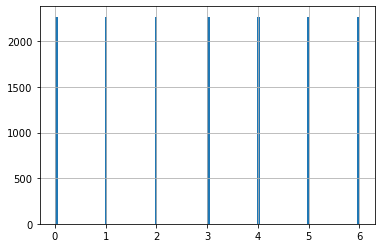

In [25]:
y_train_copy.hist(bins=int(np.sqrt(data['Class'].shape[0])))

In [26]:
df_copy=pd.concat([X_train_copy,y_train_copy],axis=1)

# Overview on data distribution

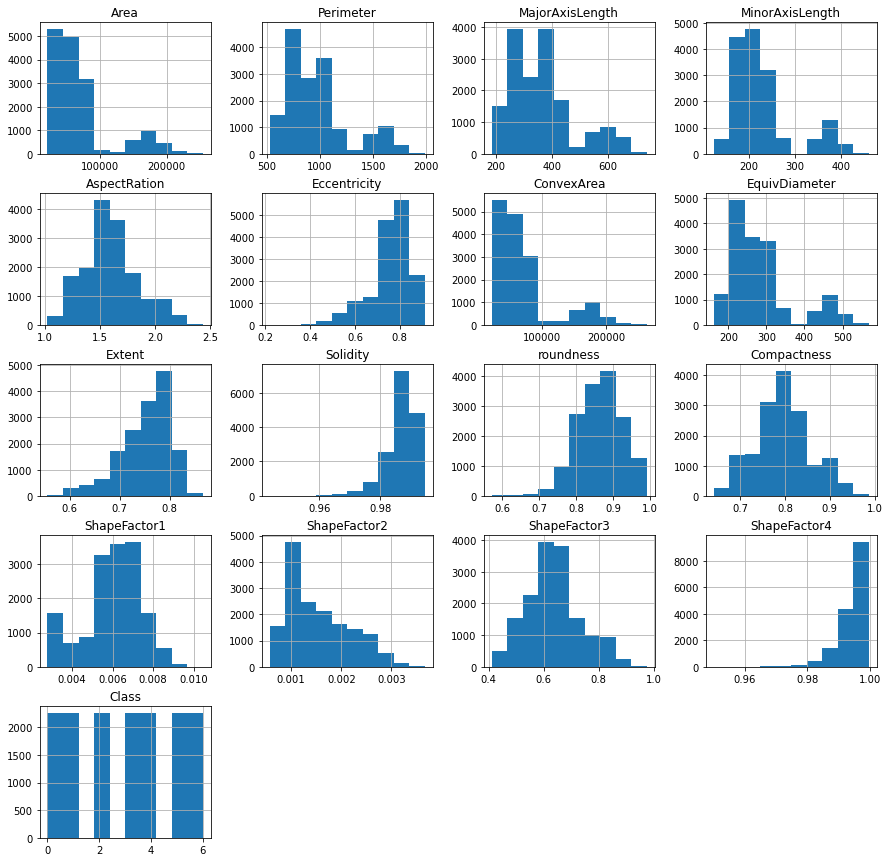

In [27]:
df_copy.histc;

# Handeling skewness and outliers

In [28]:
def display_skew_kurt(df,cols):
    skew= df.select_dtypes(np.number).skew()
    abs_skew = abs(skew)
    kurt = df.select_dtypes(np.number).kurt()
    skew_kurt_table = pd.concat([skew,abs_skew,kurt], axis = 1,
                                keys =['Skew','Absolute Skew','Kurtosis']).sort_values("Skew",ascending = False)
    skew_kurt_table['Skewed'] = skew_kurt_table['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
    return skew_kurt_table

In [29]:
skew_kurt_df = display_skew_kurt(df_copy,10)
skew_kurt_df

Skew  Absolute Skew  Kurtosis  Skewed
Area             1.708330       1.708330  1.920726    True
ConvexArea       1.704684       1.704684  1.919886    True
MinorAxisLength  1.415705       1.415705  1.036454    True
EquivDiameter    1.302695       1.302695  0.836326    True
Perimeter        1.125993       1.125993  0.515464    True
MajorAxisLength  1.002755       1.002755  0.403474    True
ShapeFactor2     0.676260       0.676260 -0.557647    True
AspectRation     0.451901       0.451901  0.015406   False
ShapeFactor3     0.378494       0.378494 -0.082912   False
Compactness      0.175508       0.175508 -0.204940   False
Class            0.000000       0.000000 -1.250016   False
roundness       -0.373841       0.373841  0.193767   False
ShapeFactor1    -0.465134       0.465134 -0.309710   False
Extent          -0.935615       0.935615  0.677689    True
Eccentricity    -1.178277       1.178277  1.610379    True
Solidity        -2.032495       2.032495  7.452700    True
ShapeFactor4    -2.298325       2.298325  9.438211    True


## Todo check what happens to data after removing outliers
> dealing with NANs problem
>* Average on this feature based on label 
>* Use KNN imputer to replace NaNs

In [30]:
data_copy = df_copy.copy()

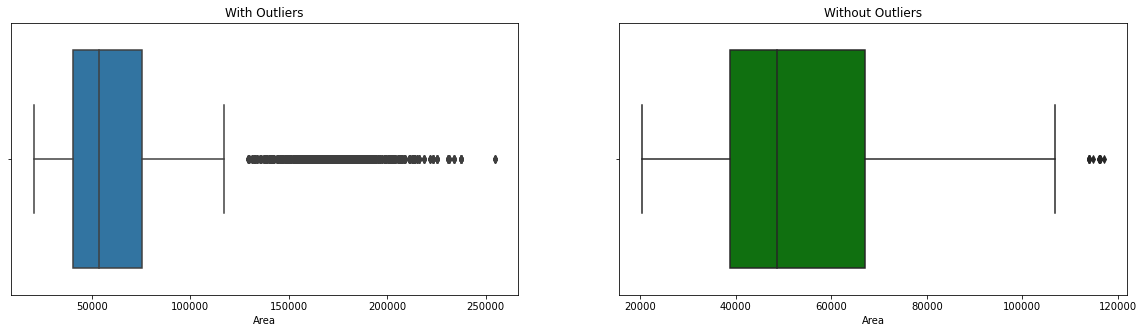

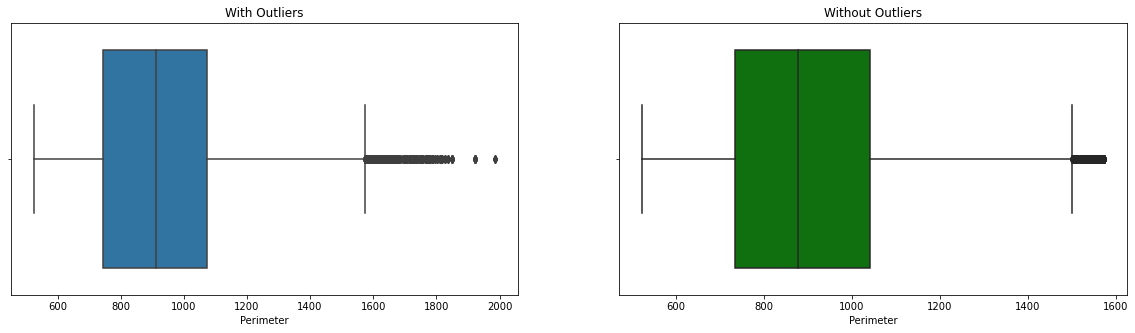

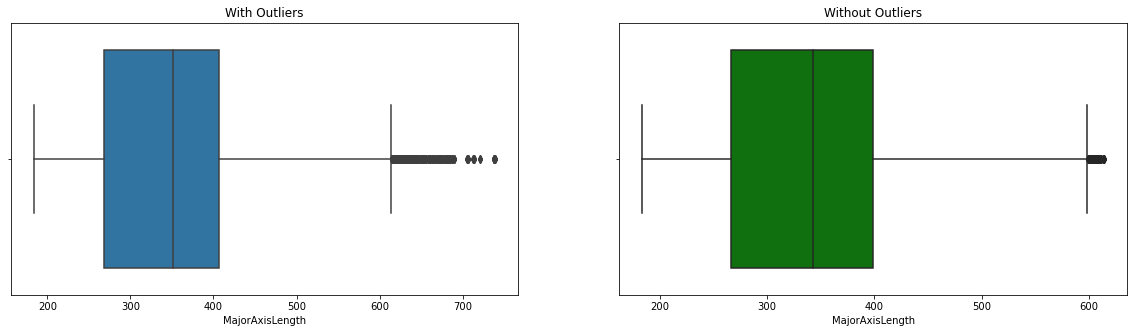

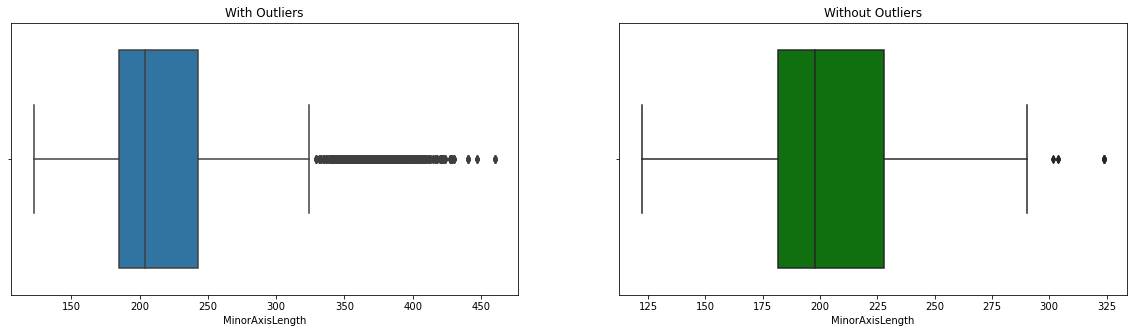

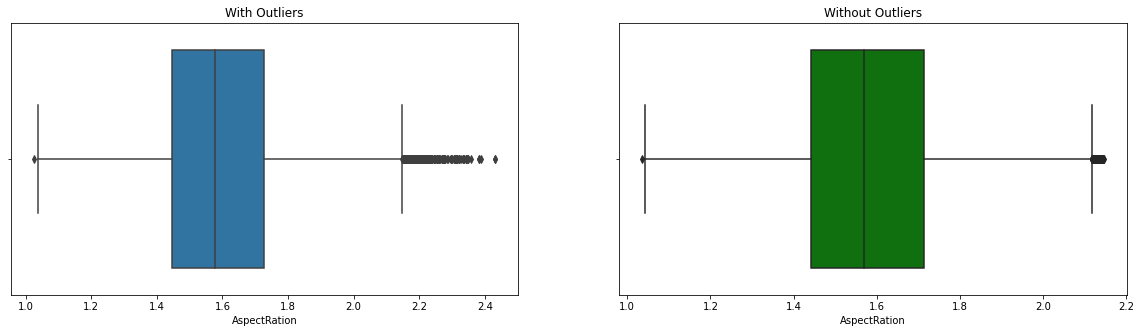

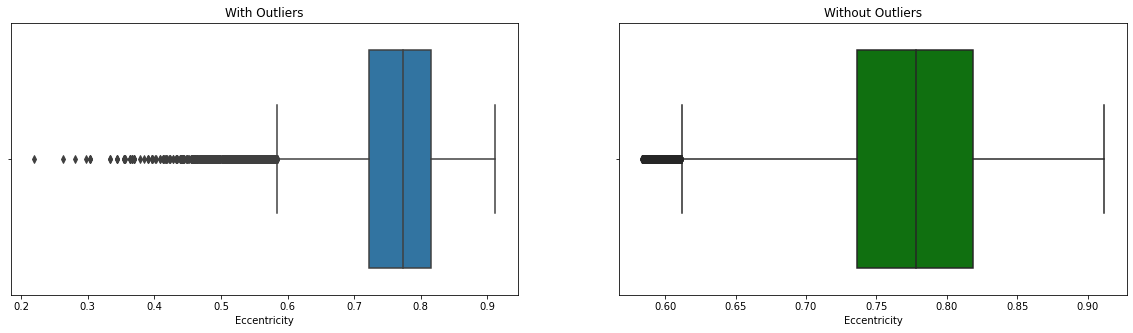

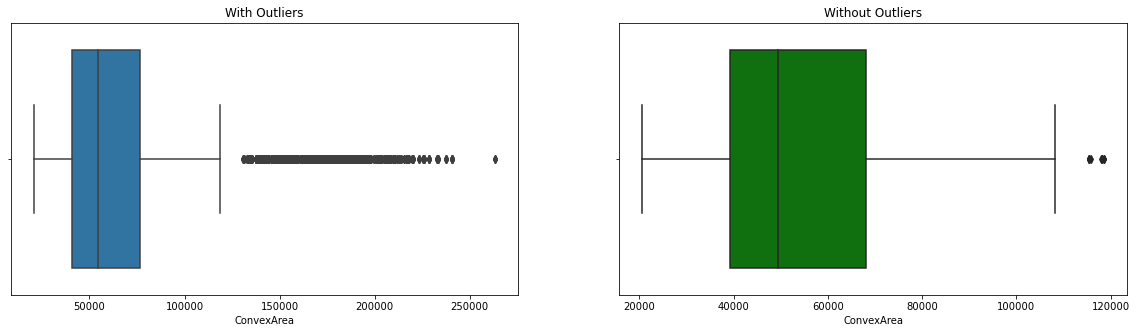

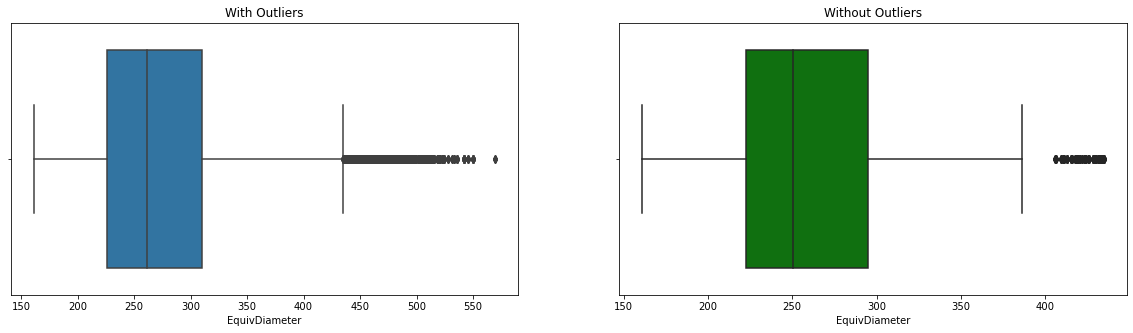

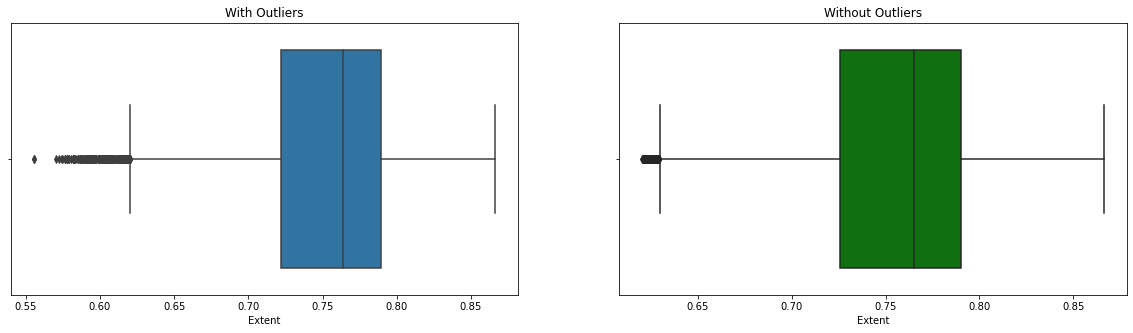

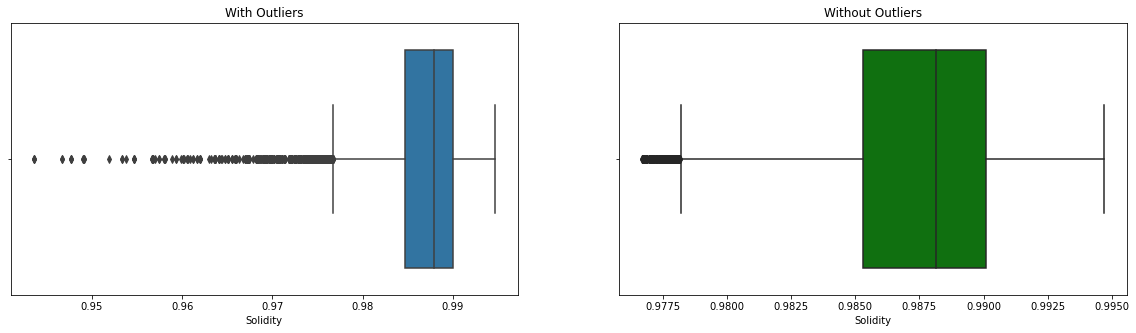

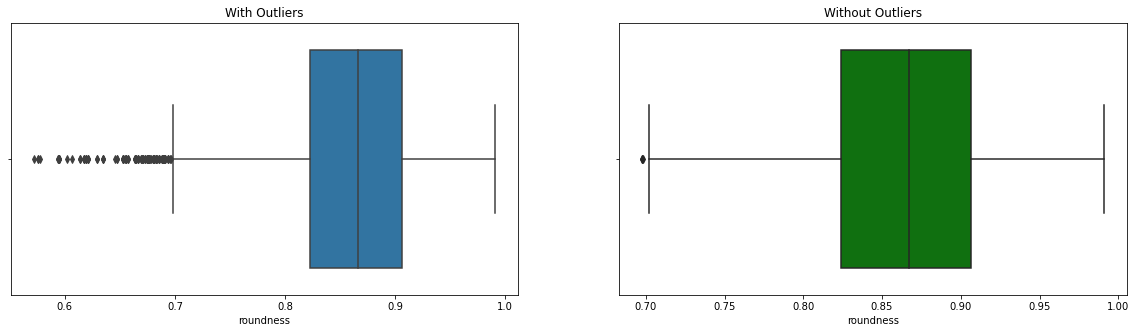

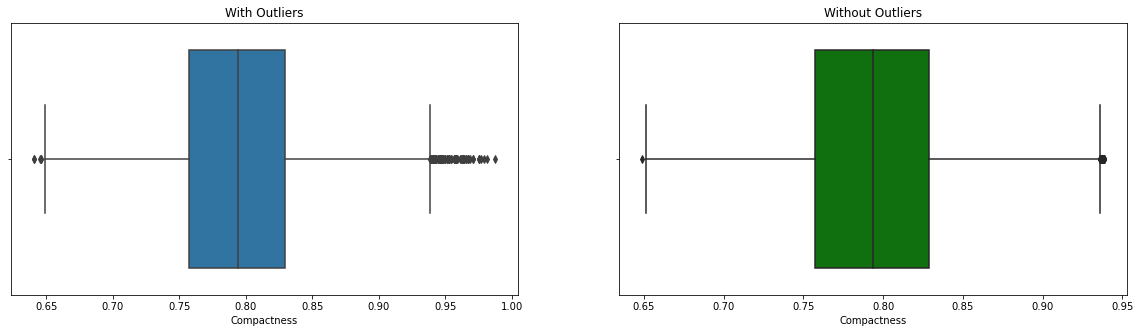

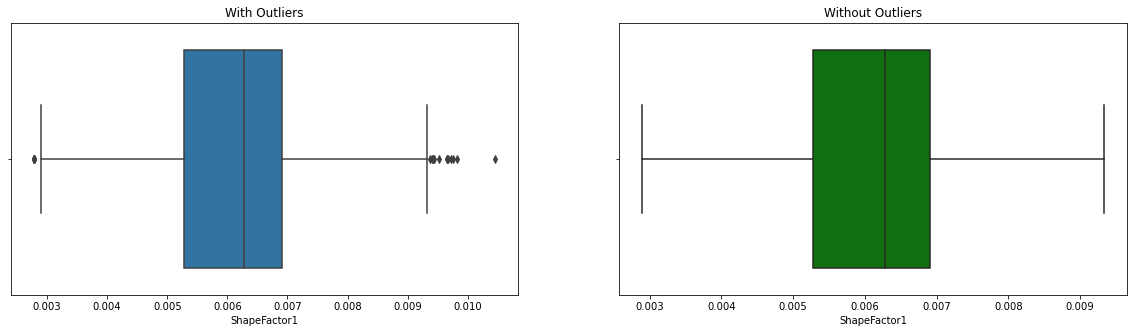

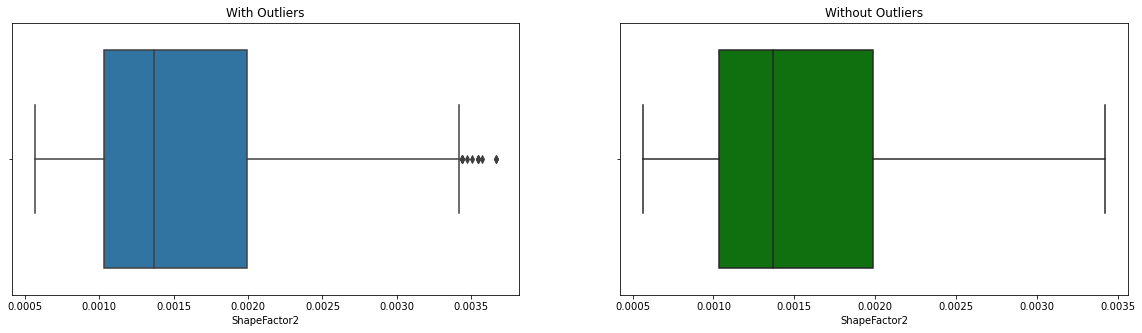

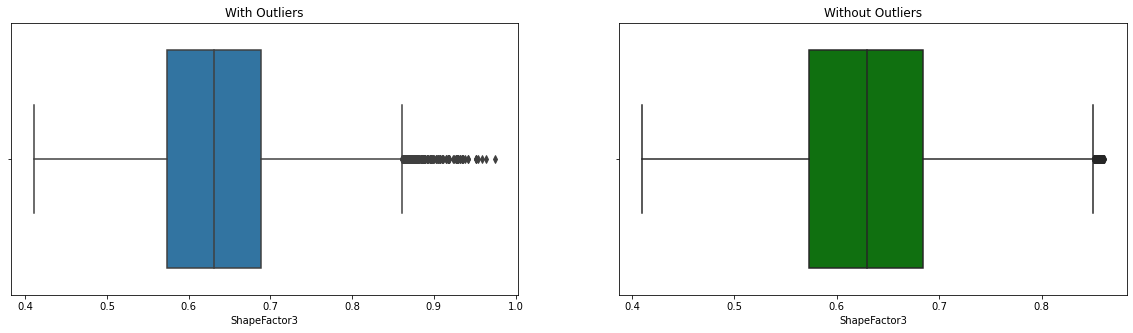

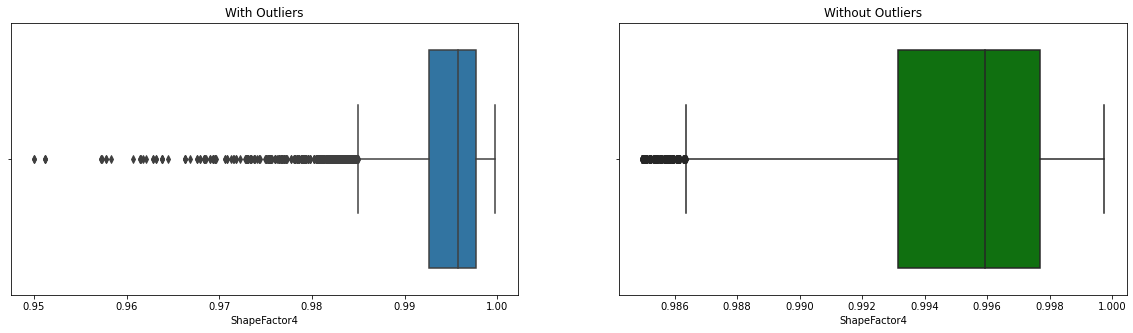

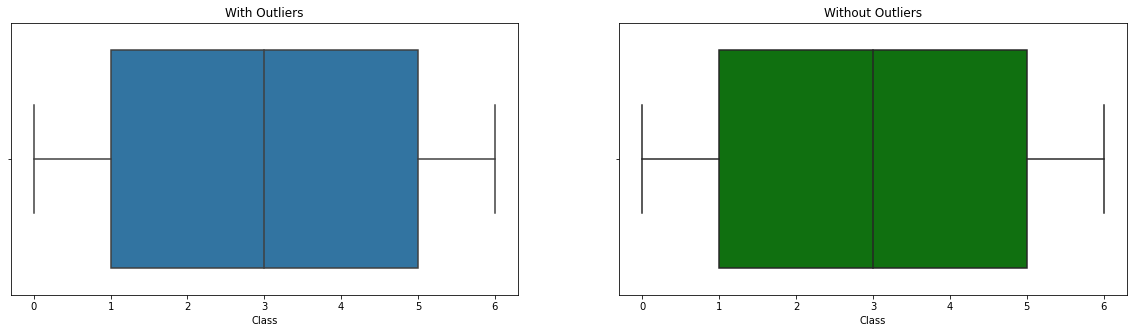

In [102]:
def outliers(df,column, min_threshold= 0.25, max_threshold = 0.75):
    
    
    import seaborn as sns
    
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(x = df[column])
    plt.title("With Outliers")
   
    
    Q1=df.quantile(min_threshold)
    Q3=df.quantile(max_threshold)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_final[column],color='green')
    #plt.xlabel("Without Outliers")
    plt.title("Without Outliers")

    plt.show()
    return df_final
    
for column in df_copy.columns:
    data_copy1 = outliers(df_copy,column)

In [104]:
imputer = KNNImputer(n_neighbors=5)
data_v3 = pd.DataFrame(imputer.fit_transform(data_copy1),columns = data_copy1.columns)

In [105]:
data_v3.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

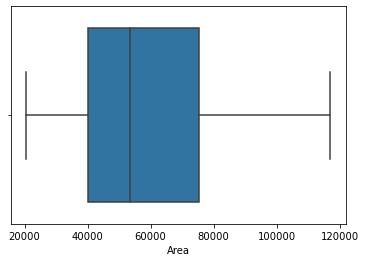

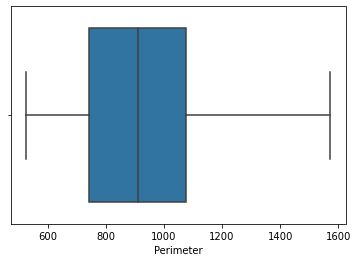

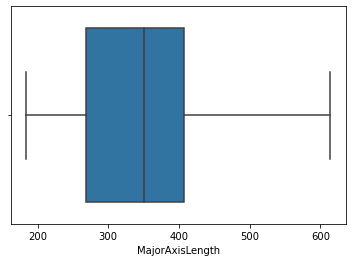

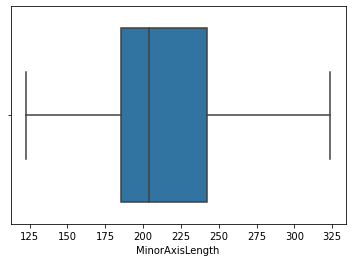

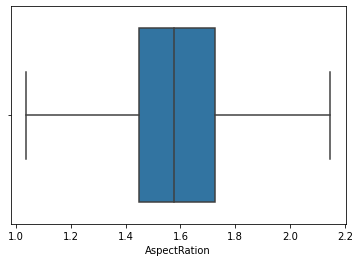

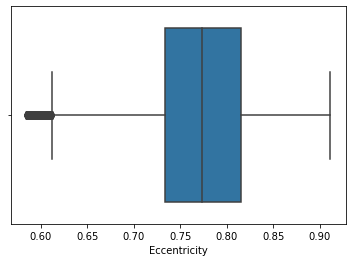

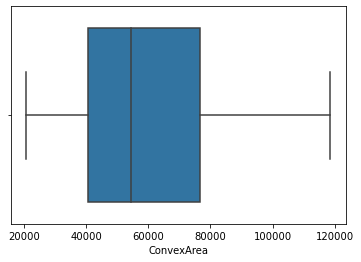

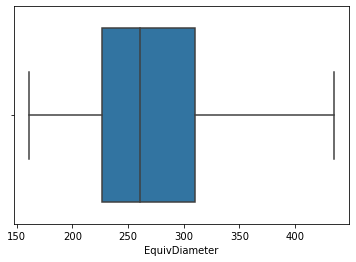

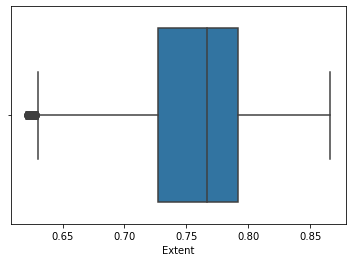

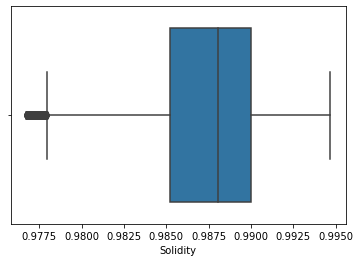

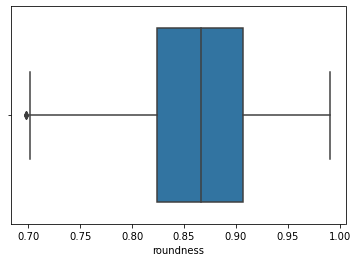

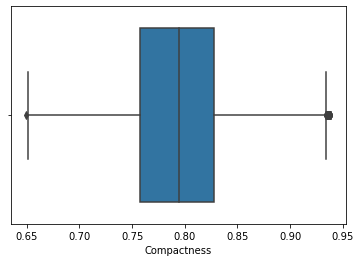

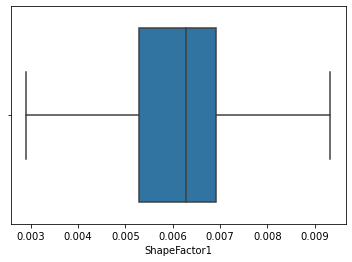

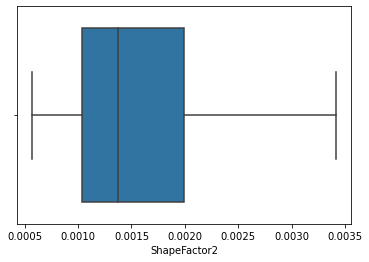

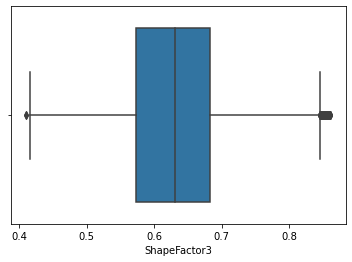

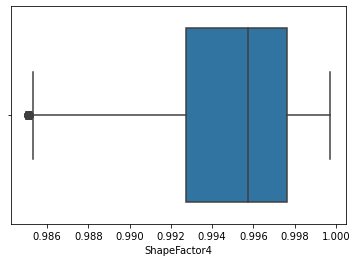

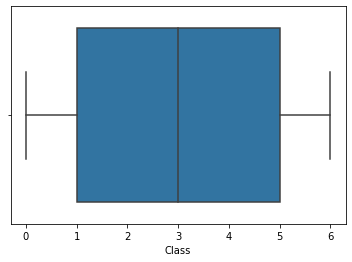

In [106]:
for column in data_v3.columns:
    ax = sns.boxplot(x= column, data=data_v3)
# Show the plot
    plt.show()

In [34]:
data_copy.shape

(15883, 17)

In [88]:
print(1001/15883)

0.06302335830762451


In [36]:
data_copy.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [107]:
data_copy = data_v3.copy()

# Explore correlation(linear relation) between data

In [108]:
data_copy.corr()['Class'].sort_values(ascending=False)

Class              1.000000
Perimeter          0.884762
ConvexArea         0.883855
Area               0.882898
EquivDiameter      0.875723
MinorAxisLength    0.858262
MajorAxisLength    0.845863
Eccentricity       0.220897
AspectRation       0.220358
Extent             0.109802
Compactness       -0.229841
ShapeFactor3      -0.232145
Solidity          -0.296260
ShapeFactor4      -0.393672
roundness         -0.485324
ShapeFactor2      -0.687338
ShapeFactor1      -0.858118
Name: Class, dtype: float64

In [109]:
data_copy.corr().style.background_gradient(cmap='coolwarm')

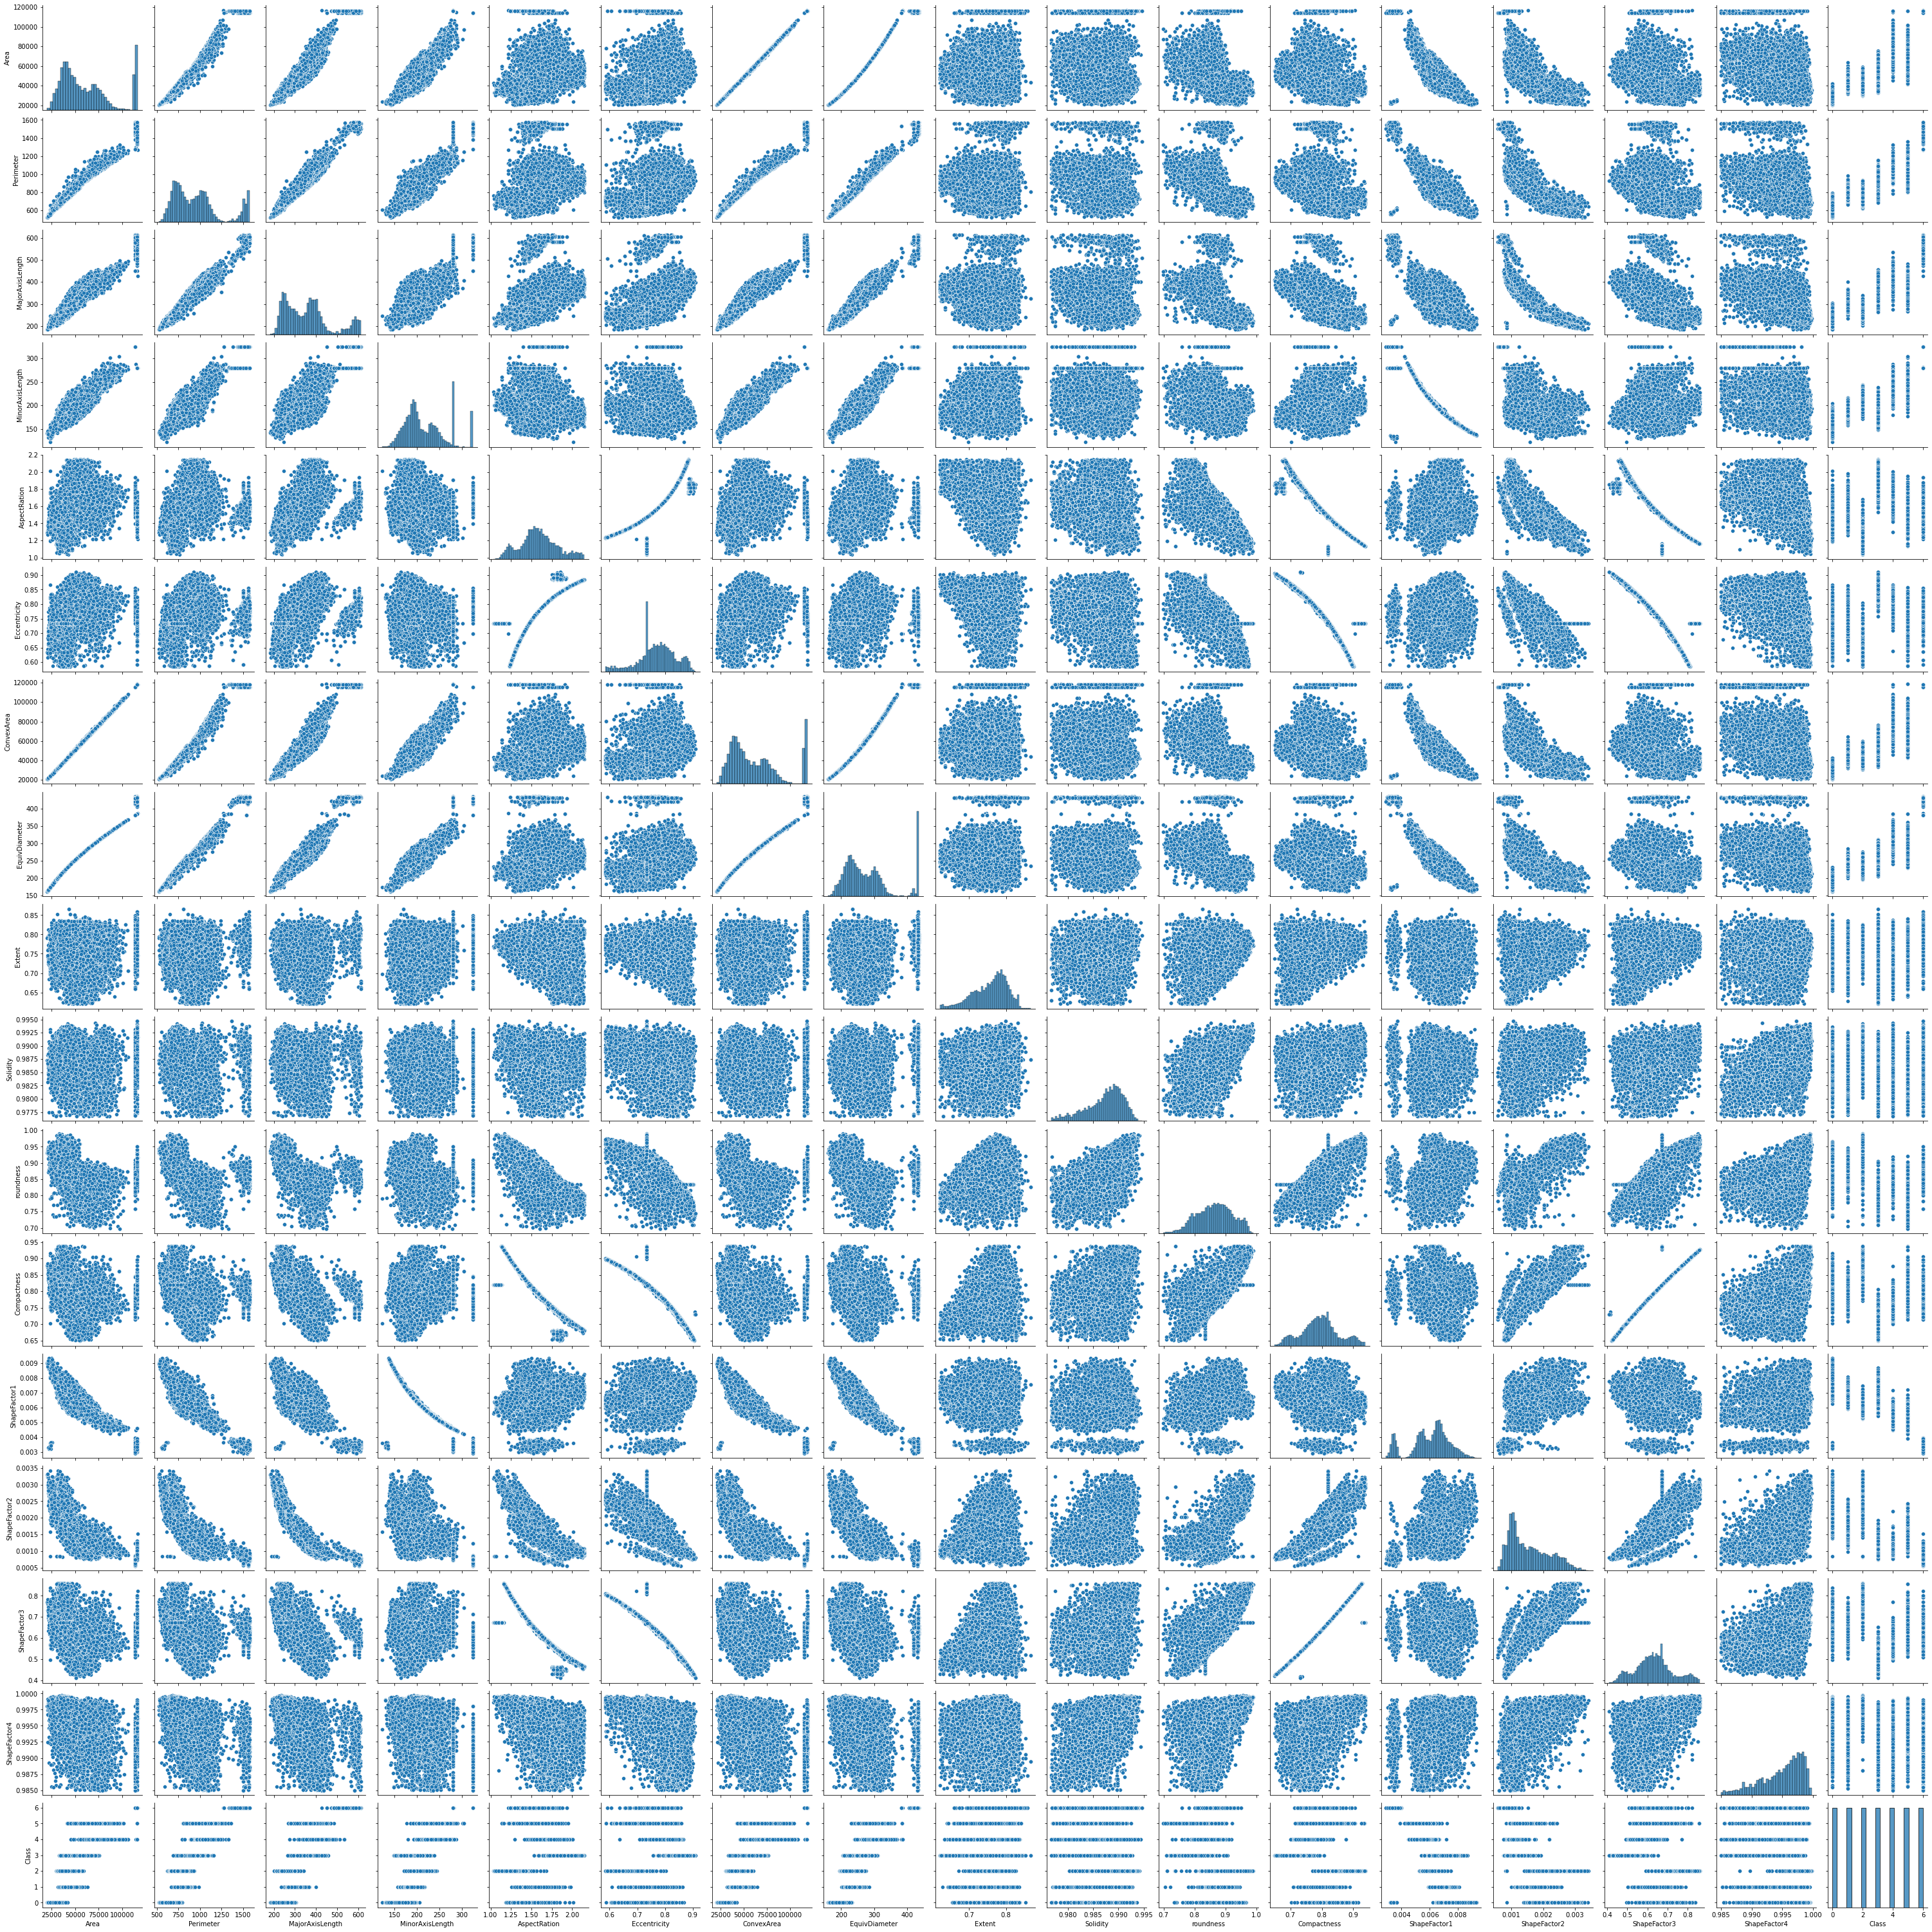

In [110]:
sns.pairplot(data_copy);

In [111]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
data_copy_features=data_copy.drop(columns='Class')
data_copy_label=data_copy['Class']

In [112]:
data_copy_features_scaled=scale.fit_transform(data_copy_features)

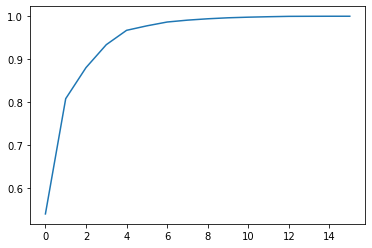

In [113]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(data_copy_features_scaled)
exp_var=pca.explained_variance_ratio_
exp_cumsum=np.cumsum(exp_var)
plt.plot(exp_cumsum)

I think 4 components will achieve about 97% preserving the data so it's fine

In [114]:
pca=PCA(n_components=6)
X=pca.fit_transform(data_copy_features_scaled)
data_copy_pca=pd.DataFrame(X)
data_copy_pca.head()

0         1         2         3         4         5
0 -3.652769 -1.456312 -0.116490 -1.973319 -0.406749 -0.581377
1 -1.904463  1.274751  0.404059  0.278875  0.418661  0.073763
2 -4.042441  0.031748 -0.475880 -0.306658 -0.145562 -0.228771
3 -3.589434  1.446581 -0.594034 -0.573301  0.161325 -0.883808
4  2.221152 -0.353978 -2.618870 -0.089524  0.279835  0.243992

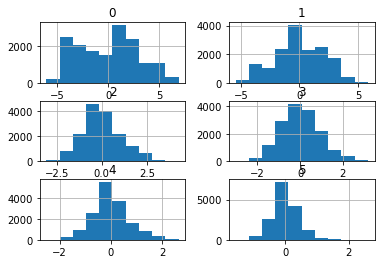

In [115]:
data_copy_pca.hist();

# Val data pipeline

In [116]:
X_val_scaled=scale.transform(X_val)
X=pca.transform(X_val_scaled)
val_data_copy_pca=pd.DataFrame(X)
val_data_copy_pca.head()

0         1         2         3         4         5
0 -4.109857 -0.391505 -0.435526 -0.635616  0.085634 -0.350291
1 -1.576767 -0.723090  0.417889  1.231746 -0.247682 -0.278647
2 -1.047444 -1.027343 -0.135453 -0.237052 -0.156979 -0.210859
3  1.253574 -0.998586 -0.517826  0.398679  1.093705 -0.122181
4  1.883040  0.320542 -0.484296 -1.105540 -0.270762 -0.375432

# Test base classifiers

In [117]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,plot_confusion_matrix

# Simple_SVM

In [118]:
clf_svm=SVC()
clf_svm.fit(data_copy_pca,data_copy_label)

SVC()

In [119]:
y_pred=clf_svm.predict(val_data_copy_pca)

In [120]:
accuracy_score(y_val,y_pred)

0.9164370982552801

In [121]:
f1_score(y_val,y_pred,average='micro')

0.9164370982552801

In [122]:
print(classification_report(
    y_val,
    y_pred,
    output_dict=False
))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       568
           1       0.85      0.86      0.86       422
           2       0.94      0.95      0.94       324
           3       0.92      0.95      0.94       308
           4       0.95      0.94      0.95       261
           5       0.97      0.92      0.94       211
           6       1.00      0.99      0.99        84

    accuracy                           0.92      2178
   macro avg       0.93      0.93      0.93      2178
weighted avg       0.92      0.92      0.92      2178



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


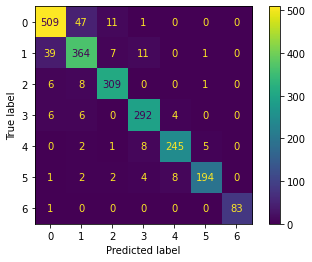

In [123]:
 plot_confusion_matrix(clf_svm,val_data_copy_pca,y_val)

# Random_search

In [124]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [125]:
distributions = dict(C=np.arange(0.01,5,0.1),kernel=['linear','rbf'])
clf = RandomizedSearchCV(clf_svm, distributions, random_state=0)
search = clf.fit(data_copy_pca,data_copy_label)


In [126]:
search.best_params_

{'kernel': 'rbf', 'C': 4.61}

In [127]:
search.best_score_

0.9450993998901106

In [128]:
best_svm_so_far=SVC(kernel= 'rbf', C= 4.71)
best_svm_so_far.fit(data_copy_pca,data_copy_label)

SVC(C=4.71)

In [129]:
score_cross_val=cross_val_score(best_svm_so_far,X_val_scaled,y_val,cv=3)

In [130]:
np.mean(score_cross_val)

0.9196510560146924

# Random_forrest

In [131]:
clf_rf = RandomForestClassifier(max_depth=6, random_state=0)
clf_rf.fit(data_copy_pca,data_copy_label)

RandomForestClassifier(max_depth=6, random_state=0)

In [132]:
y_pred=clf_rf.predict(val_data_copy_pca)

In [133]:
print(classification_report(
    y_val,
    y_pred,
    output_dict=False
))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       568
           1       0.80      0.81      0.81       422
           2       0.91      0.95      0.93       324
           3       0.93      0.95      0.94       308
           4       0.89      0.96      0.92       261
           5       0.96      0.90      0.93       211
           6       0.99      1.00      0.99        84

    accuracy                           0.89      2178
   macro avg       0.91      0.92      0.91      2178
weighted avg       0.89      0.89      0.89      2178



In [134]:
distributions = dict(n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],max_depth=np.arange(8,100), min_samples_split=[2,5,10],bootstrap=[True,False])
clf = RandomizedSearchCV(clf_rf, distributions, random_state=0)
search = clf.fit(data_copy_pca,data_copy_label)

In [135]:
search.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=80, min_samples_split=5,
                       n_estimators=400, random_state=0)

In [136]:
search.best_score_

0.9690253229089116

In [137]:
clf_rf2=RandomForestClassifier(bootstrap=False, max_depth=31, min_samples_split=5,
                       n_estimators=1800, random_state=0)

In [138]:
clf_rf2.fit(data_copy_pca,data_copy_label)

RandomForestClassifier(bootstrap=False, max_depth=31, min_samples_split=5,
                       n_estimators=1800, random_state=0)

In [139]:
y_pred=clf_rf2.predict(val_data_copy_pca)

In [140]:
print(classification_report(
    y_val,
    y_pred,
    output_dict=False
))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       568
           1       0.88      0.83      0.85       422
           2       0.93      0.95      0.94       324
           3       0.94      0.94      0.94       308
           4       0.95      0.95      0.95       261
           5       0.97      0.93      0.95       211
           6       0.99      1.00      0.99        84

    accuracy                           0.92      2178
   macro avg       0.94      0.93      0.93      2178
weighted avg       0.92      0.92      0.92      2178



# GradientBoost

In [141]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gb=GradientBoostingClassifier(learning_rate=0.1,n_estimators=800,min_samples_split=5,max_depth=10)

In [142]:
clf_gb.fit(data_copy_pca,data_copy_label)

GradientBoostingClassifier(max_depth=10, min_samples_split=5, n_estimators=800)

In [143]:
y_pred=clf_gb.predict(val_data_copy_pca)

In [144]:
print(classification_report(
    y_val,
    y_pred,
    output_dict=False
))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       568
           1       0.87      0.82      0.85       422
           2       0.93      0.93      0.93       324
           3       0.95      0.93      0.94       308
           4       0.94      0.94      0.94       261
           5       0.96      0.90      0.93       211
           6       0.98      1.00      0.99        84

    accuracy                           0.91      2178
   macro avg       0.93      0.92      0.92      2178
weighted avg       0.91      0.91      0.91      2178



# XGboost

In [147]:
import xgboost as xgb

In [148]:
clf_xg=xgb.XGBClassifier()
clf_xg.fit(data_copy_pca,data_copy_label)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [149]:
y_pred=clf_xg.predict(val_data_copy_pca)

In [150]:
print(classification_report(
    y_val,
    y_pred,
    output_dict=False
))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       568
           1       0.84      0.86      0.85       422
           2       0.94      0.95      0.95       324
           3       0.94      0.95      0.94       308
           4       0.95      0.95      0.95       261
           5       0.96      0.91      0.94       211
           6       0.99      1.00      0.99        84

    accuracy                           0.92      2178
   macro avg       0.93      0.93      0.93      2178
weighted avg       0.92      0.92      0.92      2178

